### Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps: 
1. Import the necessary packages
2. Load the training and testing data 
3. Define the network architecture using Keras 
4. Train the model using SGD with 11 epochs
5. Evaluate the network  
6. Plot the training loss and accuracy

## Import Packages

In [1]:
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2022-11-15 13:46:01.683029: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 13:46:01.862226: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 13:46:01.862248: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-15 13:46:01.895399: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 13:46:02.724406: W tensorflow/stream_executor/platform/de

## Loading the training and test data

In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

#if there are 2 datasets mnist_train.csv and mnist_test.csv

# train_data = pd.read_csv('mnist_train.csv')
# test_data = pd.read_csv('mnist_test.csv')

# x_train = train_data.drop('labels', axis=1)
# x_test = test_data.drop('labels', axis=1)

# y_train = train_data['labels']
# y_test =  test_data['labels']

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
## Reshaping by converting to array
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape((x_train.shape[0], 28 * 28 * 1))
x_test = x_test.reshape((x_test.shape[0], 28 * 28 * 1))

In [5]:
## Scaling 
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [6]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

## Define the network architecture using Keras

In [7]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

sgd = SGD(learning_rate=0.01, momentum=0)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


2022-11-15 13:46:05.541810: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 13:46:05.541849: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 13:46:05.541883: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (akash-kulkarni): /proc/driver/nvidia/version does not exist
2022-11-15 13:46:05.542180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train the model using SGD with 11 epochs

In [8]:
batch_size = 512
epochs = 11

history = model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=batch_size, epochs=epochs)

2022-11-15 13:46:05.674982: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/11
118/118 [==============================] - 1s 8ms/step - loss: 2.1410 - accuracy: 0.2753 - val_loss: 1.8739 - val_accuracy: 0.5327
Epoch 2/11
118/118 [==============================] - 1s 7ms/step - loss: 1.6196 - accuracy: 0.5744 - val_loss: 1.2816 - val_accuracy: 0.7296
Epoch 3/11
118/118 [==============================] - 1s 7ms/step - loss: 1.1579 - accuracy: 0.6951 - val_loss: 0.8964 - val_accuracy: 0.8079
Epoch 4/11
118/118 [==============================] - 1s 7ms/step - loss: 0.8964 - accuracy: 0.7543 - val_loss: 0.6993 - val_accuracy: 0.8420
Epoch 5/11
118/118 [==============================] - 1s 7ms/step - loss: 0.7549 - accuracy: 0.7877 - val_loss: 0.5927 - val_accuracy: 0.8589
Epoch 6/11
118/118 [==============================] - 1s 7ms/step - loss: 0.6681 - accuracy: 0.8091 - val_loss: 0.5241 - val_accuracy: 0.8708
Epoch 7/11
118/118 [==============================] - 1s 8ms/step - loss: 0.6049 - accuracy: 0.8275 - val_loss: 0.4779 - val_accuracy: 0.8785
Epoch 

## Evaluate the network 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8982
Test Loss: 0.3812884986400604, Test Accuracy: 0.8981999754905701


In [10]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Plotting the training loss and accuracy

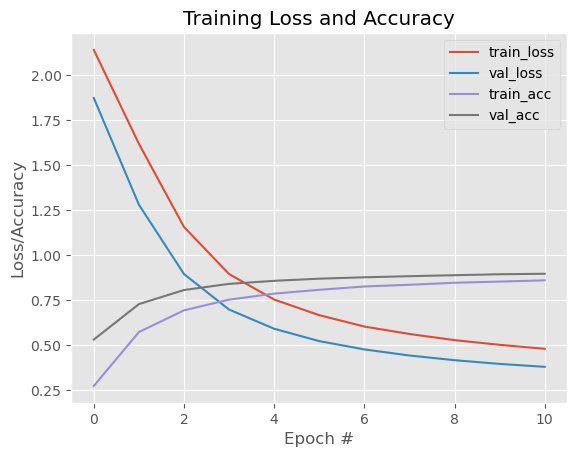

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()